<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Guide/Data%20Input%20Pipelines/tf.data/Data_Input_Pipelines_tf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import display, clear_output, HTML 
HTML('<img align="center" src="https://www.tensorflow.org/images/tf_logo_social.png" width="100%">')

### Importing the libraries and dependencies

In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 1.9MB/s 
     |████████████████████████████████| 450kB 35.0MB/s 
     |████████████████████████████████| 3.8MB 35.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=6208219eb7cbaaa09417bdf1eca702206b1eda5834ebc3abad5461ecd51bd7cf
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
from __future__ import print_function, absolute_import, division

import os
os.environ["PYTHONHASHSEED"] = str(101)
import gc
gc.enable()

import tensorflow as tf
import pathlib 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
np.set_printoptions(precision=4)

In [0]:
print(tf.__version__)

2.0.0


In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 23.3MB/s 
     |████████████████████████████████| 450kB 35.2MB/s 
     |████████████████████████████████| 3.8MB 22.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=c7292319ec10b0a8f654a960508811585f1aa08f348aa71c0b54bba53794e4df
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


### Basic Mechanics

In [0]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [0]:
for el in dataset:
  print(el.numpy())

8
3
0
8
2
1


In [0]:
it = iter(dataset)
print(next(it).numpy())

8


In [0]:
print(dataset.reduce(0, lambda state, value: state + value).numpy())

22


### Dataset Structure

In [0]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4,10]))
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [0]:
dataset2 = tf.data.Dataset.from_tensor_slices((tf.random.uniform([4,10]),
                                              tf.random.uniform([4,100], maxval=100, dtype=tf.int32)))
dataset2.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [0]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(10,), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [0]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor([[0,0],[1,2]],values=[1,2],dense_shape=[3,4]))
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [0]:
dataset = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4,10],minval=1,maxval=100,dtype=tf.float32)
)
print(dataset.element_spec)
for z in dataset:
  print(z.numpy())

TensorSpec(shape=(10,), dtype=tf.float32, name=None)
[58.2229 95.8636 21.5689 43.651   8.8075 47.8708 15.9966 54.3221 96.4929
  1.2176]
[97.3124 78.929  14.7597 66.1848 56.8828 15.0722 97.1652 84.7762 48.597
 37.013 ]
[27.1404 85.7748 52.0497  7.8635 42.045  66.2701 31.8707 51.1625 35.7703
 14.3304]
[98.0913  2.7425 24.2658 23.3437 78.0316 21.912  50.1817 70.9067 78.0438
 27.2492]


In [0]:
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]),
    tf.random.uniform([4,100], maxval=100, dtype=tf.int32)
))
dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [0]:
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [0]:
dataset3 = tf.data.Dataset.zip((dataset1,dataset2))
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [0]:
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.float32, (tf.float32, tf.int32))>

In [0]:
for i in dataset3:
  print(i)

(<tf.Tensor: id=205, shape=(10,), dtype=float32, numpy=
array([0.439 , 0.226 , 0.0898, 0.8753, 0.1049, 0.3095, 0.4951, 0.8769,
       0.9157, 0.2549], dtype=float32)>, (<tf.Tensor: id=206, shape=(), dtype=float32, numpy=0.36811376>, <tf.Tensor: id=207, shape=(100,), dtype=int32, numpy=
array([55, 46, 47, 29, 68,  5, 45, 85,  7, 69, 48, 74, 10, 48,  9, 75, 52,
       59, 67, 98, 82, 49, 88,  4,  8, 70, 49, 55, 24, 95, 27, 78, 42, 85,
       74, 53, 17, 24, 89, 10, 84, 70, 91,  0, 99, 78, 57, 26, 43, 59,  7,
       39, 84, 23, 56, 17,  7, 23, 59, 11, 71, 38, 75, 86, 24, 56, 85, 33,
       40, 41, 55, 65, 61, 37, 88, 47, 19, 98, 32, 38, 92,  6, 79, 41, 75,
       28, 40, 65, 19, 93, 96,  1, 13, 28, 55,  2, 16, 85, 25, 13],
      dtype=int32)>))
(<tf.Tensor: id=208, shape=(10,), dtype=float32, numpy=
array([0.4383, 0.9911, 0.6324, 0.563 , 0.903 , 0.7714, 0.7813, 0.1077,
       0.1381, 0.6339], dtype=float32)>, (<tf.Tensor: id=209, shape=(), dtype=float32, numpy=0.7525537>, <tf.Tensor: id=2

In [0]:
for a, (b,c) in dataset3:
  print(f"{a.shape}, {b.shape}, {c.shape}")

(10,), (), (100,)
(10,), (), (100,)
(10,), (), (100,)
(10,), (), (100,)


### Reading Input Data

#### Consuming NumPy arrays

In [0]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
images, labels = train
images = images / 255.0 
train_dataset = tf.data.Dataset.from_tensor_slices((images, labels))

In [0]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

model.fit(train_dataset, epochs=5)

Epoch 1/5
938/938 [==============================] - 7s 8ms/step - loss: 0.5343 - sparse_categorical_accuracy: 0.8100
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3892 - sparse_categorical_accuracy: 0.8592
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3464 - sparse_categorical_accuracy: 0.8743
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3209 - sparse_categorical_accuracy: 0.8831
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.8899


In [0]:
HTML('<p style="color:#95B9C7;"><strong>Note:</strong>  The above code snippet will embed the features and labels arrays in your TensorFlow graph as tf.constant() operations. This works well for a small dataset, but wastes memory---because the contents of the array will be copied multiple times---and can run into the 2GB limit for the tf.GraphDef protocol buffer.</p>')

#### Consuming Python Generators

In [0]:
from IPython.display import display, clear_output, HTML
HTML('<p style="color:orangered;"><strong>Caution:</strong> While this is a convienient approach it has limited portability and scalibility. It must run in the same python process that created the generator, and is still subject to the <a href="https://en.wikipedia.org/wiki/Global_interpreter_lock">Python GIL.</a></p>')

  *  The Dataset.from_generator constructor converts the python generator to a fully functional tf.data.Dataset.

  *  The constructor takes a callable as input, not an iterator. This allows it to restart the generator when it reaches the end. It takes an optional args argument, which is passed as the callable's arguments.

  *  The output_types argument is required because tf.data builds a tf.Graph internally, and graph edges require a tf.dtype.

In [0]:
def count(stop):
  i = 0
  while i < stop:
    yield i
    i += 1

In [0]:
for i in count(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [0]:
ds_counter = tf.data.Dataset.from_generator(count, args=[50], output_types=tf.int32, output_shapes=())

In [0]:
ds_counter.element_spec

TensorSpec(shape=(), dtype=tf.int32, name=None)

In [0]:
for count_batch in ds_counter.repeat().batch(10).take(5):
  print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


In [0]:
for count_batch in ds_counter.repeat().batch(5).take(5):
  print(count_batch.numpy())

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]


In [0]:
for count_batch in ds_counter.repeat().batch(5).take(20):
  print(count_batch.numpy())

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28 29]
[30 31 32 33 34]
[35 36 37 38 39]
[40 41 42 43 44]
[45 46 47 48 49]
[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28 29]
[30 31 32 33 34]
[35 36 37 38 39]
[40 41 42 43 44]
[45 46 47 48 49]


In [0]:
def gen_series():
  i = 0
  while True:
    size = np.random.randint(0, 10)
    yield i, np.random.normal(size=(size,))
    i += 1

In [0]:
for i, series in gen_series():
  print(i, ":", str(series))
  if i>5:
    break

0 : [0.8917]
1 : []
2 : [-1.685  -1.0627 -1.8413  1.4036  0.252  -1.795  -0.9282  1.3021  0.5005]
3 : [-0.2699 -2.2725 -0.038   1.7539 -2.6609 -0.4136  0.4193  2.2177]
4 : [-0.1253]
5 : []
6 : [ 0.9381  0.9124 -0.402   1.0858 -2.1528  0.4984]


In [0]:
ds_series = tf.data.Dataset.from_generator(
    gen_series,
    output_types = (tf.int32, tf.float32),
    output_shapes = ((), (None,))
)

ds_series

<DatasetV1Adapter shapes: ((), (None,)), types: (tf.int32, tf.float32)>

In [0]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10, padded_shapes=([], [None]))

ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[16  1 12  4  2 24  7  8 15 22]

[[ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [-0.8091  1.3989 -0.4963 -1.0462 -0.1312 -1.0703 -0.2454 -0.1684  0.    ]
 [-0.0797 -1.0968  0.6877  0.2361 -1.4262 -0.7754 -0.8297  1.1157  0.7561]
 [ 1.3459  0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.3995  0.7997  0.      0.      0.      0.      0.      0.      0.    ]
 [ 2.528  -0.3075  1.3746 -2.2849 -1.3409  0.1332  0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
 [ 0.604   0.5408 -0.4383  0.7487  0.1049 -0.6179  0.      0.      0.    ]
 [-1.2918  1.1521 -0.7576 -0.2808  0.      0.      0.      0.      0.    ]
 [-0.9229  0.      0.      0.      0.      0.      0.      0.      0.    ]]


##### Wrapping preprocessing.image.ImageDataGenerator as tf.data.Dataset

In [0]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar = True
)

In [0]:
flowers

'/root/.keras/datasets/flower_photos'

In [0]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 20
)

In [0]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [0]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [0]:
ds = tf.data.Dataset.from_generator(
    img_gen.flow_from_directory, 
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3],[32,5])
)

print(ds)

<DatasetV1Adapter shapes: ((32, 256, 256, 3), (32, 5)), types: (tf.float32, tf.float32)>


In [0]:
# for value in ds.take(2):
#   print(value)

#### Consuming TFRecord Data

    The tf.data API supports a variety of file formats so that you can process large datasets that do not fit in memory. For example, the TFRecord file format is a simple record-oriented binary format that many TensorFlow applications use for training data. The tf.data.TFRecordDataset class enables you to stream over the contents of one or more TFRecord files as part of an input pipeline.

In [0]:
fsns_test_file = tf.keras.utils.get_file('fsns.tfrec', "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")

7905280/7904079 [==============================] - 0s 0us/step


    The filenames argument to the TFRecordDataset initializer can either be a string, a list of strings, or a tf.Tensor of strings. Therefore if you have two sets of files for training and validation purposes, you can create a factory method that produces the dataset, taking filenames as an input argument:

In [0]:
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])

In [0]:
dataset.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

In [0]:
dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

    Many TensorFlow projects use serialized tf.train.Example records in their TFRecord files. These need to be decoded before they can be inspected:

In [0]:
raw_example = next(iter(dataset))
print(raw_example)
print(raw_example.numpy())
print(raw_example.dtype)

tf.Tensor(b'\n\xeb\xf0\x07\n\x1a\n\x10image/orig_width\x12\x06\x1a\x04\n\x02\xd8\x04\n\x1e\n\nimage/text\x12\x10\n\x0e\n\x0cRue Perreyon\n(\n\x14image/unpadded_class\x12\x10\x1a\x0e\n\x0c1\x0b\x05\x00/\x05\x15\x15\x05!\x0c\x07\n\xe6\xee\x07\n\rimage/encoded\x12\xd3\xee\x07\n\xcf\xee\x07\n\xcb\xee\x07\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X\x00\x00\x00\x96\x08\x02\x00\x00\x00\x8dyaf\x00\x00\x00\tpHYs\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9db&2\x00\x00 \x00IDATx\x9c\xa4\xbd\xd9\x96$\xc9\x91%&\x8b\xaa\x9a\xf9\x16\x11\x99UYUh4\x9a\xe7\xb0y\x0e\x7fv^\xf9\xc0\x7f\xe0\x1b\x1f\xf8;=\xbd\xcc\x00\xa8\xca%2|1U\x95e\x1eD\xcd\xc2#\xb3\xd0 \x87V\xc8@\xf8\x12\xe6f\xaa\xb2\\\xb9\xb28\xfe\x9f\xff\xc7\x7fqw\x00\x88\x9f\xaajf\x88\x08\x00\xf7?\x19\x10\xd6#\xde\xb9\xbd\xb4=\x1c\xe7\x01wrB\xc2\xbb\xc3\xdd[k\xf1\xfe\xfb\x83\x1c\xd0\xbfy\xee\xf5\x84\xdf<\xe3w\x7f\xbd\x9dJU\xbf\xfd{\x00w\x04\x00fffw73UqG"\xfe\xe6\xbe\x00\xa0\xb5v\xf7\xa4\xc7\xef\x84\x88\xeb-\xbb\xeb\xb8\x06\x04@$"f\x8e\x8f\x16\x91X.3sw"

In [0]:
parsed = tf.train.Example.FromString(raw_example.numpy())

In [0]:
parsed

features {
  feature {
    key: "image/class"
    value {
      int64_list {
        value: 49
        value: 11
        value: 5
        value: 0
        value: 47
        value: 5
        value: 21
        value: 21
        value: 5
        value: 33
        value: 12
        value: 7
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
        value: 133
      }
    }
  }
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\211PNG\r\n\032\n\000\000\000\rIHDR\000\000\002X\000\000\000\226\010\002\000\000\000\215yaf\000\000\000\tpHYs\000\000\000\000\000\000\0

In [0]:
parsed.features.feature['image/text']

bytes_list {
  value: "Rue Perreyon"
}

In [0]:
parsed.features.feature["image/width"]

int64_list {
  value: 600
}

In [0]:
parsed.features.feature["image/class"]

int64_list {
  value: 49
  value: 11
  value: 5
  value: 0
  value: 47
  value: 5
  value: 21
  value: 21
  value: 5
  value: 33
  value: 12
  value: 7
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
  value: 133
}

#### Consuming text data

    Many datasets are distributed as one or more text files. The tf.data.TextLineDataset provides an easy way to extract lines from one or more text files. Given one or more filenames, a TextLineDataset will produce one string-valued element per line of those files.

In [0]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_path = [
             tf.keras.utils.get_file(file_name, directory_url+file_name) 
             for file_name in file_names]

811008/807992 [==============================] - 0s 0us/step


In [0]:
file_path

['/root/.keras/datasets/cowper.txt',
 '/root/.keras/datasets/derby.txt',
 '/root/.keras/datasets/butler.txt']

In [0]:
dataset = tf.data.TextLineDataset(file_path)
print(dataset.element_spec)
print()
for line in dataset.take(10):
  print(line.numpy())

TensorSpec(shape=(), dtype=tf.string, name=None)

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'
b'To dogs and to all ravening fowls a prey,'
b'When fierce dispute had separated once'
b'The noble Chief Achilles from the son'
b'Of Atreus, Agamemnon, King of men.'
b"Who them to strife impell'd? What power divine?"


In [0]:
files_ds = tf.data.Dataset.from_tensor_slices(file_path)
print(files_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [0]:
lines_ds = files_ds.interleave(tf.data.TextLineDataset, cycle_length=3)
for i, line in enumerate(lines_ds.take(9)):
  if i%3==0:
    print()
  print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b"\xef\xbb\xbfOf Peleus' son, Achilles, sing, O Muse,"
b'\xef\xbb\xbfSing, O goddess, the anger of Achilles son of Peleus, that brought'

b'His wrath pernicious, who ten thousand woes'
b'The vengeance, deep and deadly; whence to Greece'
b'countless ills upon the Achaeans. Many a brave soul did it send'

b"Caused to Achaia's host, sent many a soul"
b'Unnumbered ills arose; which many a soul'
b'hurrying down to Hades, and many a hero did it yield a prey to dogs and'


In [0]:
titanic_file = tf.keras.utils.get_file('train.csv', "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

32768/30874 [===============================] - 0s 0us/step


In [0]:
for line in titanic_lines.take(10):
  print(line.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


In [0]:
def survived(line):
  return tf.not_equal(tf.strings.substr(line,0,1), "0")

survivors = titanic_lines.skip(1).filter(survived)

In [0]:
x = 0
for i in survivors:
  print(i.numpy())
  x += 1
  if x>5:
    break

b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


#### Consuming CSV files

In [0]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

In [0]:
df = pd.DataFrame.from_csv(titanic_file, index_col=None)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


survived     sex   age  ...     deck  embark_town  alone
0         0    male  22.0  ...  unknown  Southampton      n
1         1  female  38.0  ...        C    Cherbourg      n
2         1  female  26.0  ...  unknown  Southampton      y
3         1  female  35.0  ...        C  Southampton      n
4         0    male  28.0  ...  unknown   Queenstown      y

[5 rows x 10 columns]

In [0]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))
for feature_batch in titanic_slices.take(1):
  for key, value in feature_batch.items():
    print("   {!r:20s}: {}".format(key, value))

   'survived'          : 0
   'sex'               : b'male'
   'age'               : 22.0
   'n_siblings_spouses': 1
   'parch'             : 0
   'fare'              : 7.25
   'class'             : b'Third'
   'deck'              : b'unknown'
   'embark_town'       : b'Southampton'
   'alone'             : b'n'


In [0]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived"
)

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


In [0]:
titanic_batches.element_spec

(OrderedDict([('sex', TensorSpec(shape=(4,), dtype=tf.string, name=None)),
              ('age', TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
              ('n_siblings_spouses',
               TensorSpec(shape=(4,), dtype=tf.int32, name=None)),
              ('parch', TensorSpec(shape=(4,), dtype=tf.int32, name=None)),
              ('fare', TensorSpec(shape=(4,), dtype=tf.float32, name=None)),
              ('class', TensorSpec(shape=(4,), dtype=tf.string, name=None)),
              ('deck', TensorSpec(shape=(4,), dtype=tf.string, name=None)),
              ('embark_town',
               TensorSpec(shape=(4,), dtype=tf.string, name=None)),
              ('alone', TensorSpec(shape=(4,), dtype=tf.string, name=None))]),
 TensorSpec(shape=(4,), dtype=tf.int32, name=None))

In [0]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("Survived: {}".format(label_batch))
  print("features: ")
  for key, value in feature_batch.items():
    print(" {!r:20s}: {}".format(key, value))

Survived: [0 0 0 0]
features: 
 'sex'               : [b'male' b'male' b'male' b'male']
 'age'               : [31. 43. 37. 17.]
 'n_siblings_spouses': [0 0 1 0]
 'parch'             : [0 0 0 0]
 'fare'              : [50.4958  8.05   26.      8.6625]
 'class'             : [b'First' b'Third' b'Second' b'Third']
 'deck'              : [b'A' b'unknown' b'unknown' b'unknown']
 'embark_town'       : [b'Southampton' b'Southampton' b'Southampton' b'Southampton']
 'alone'             : [b'y' b'y' b'n' b'y']


In [0]:
titanic_batches = tf.data.experimental.make_csv_dataset(titanic_file, 4, label_name="survived", select_columns=['class', 'fare', 'survived'])

In [0]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("survived: {}".format(label_batch))
  for key, value in feature_batch.items():
    print("   {!r:20s}: {}".format(key, value))

survived: [0 0 0 0]
   'fare'              : [ 7.8958  9.4833 10.5    53.1   ]
   'class'             : [b'Third' b'Third' b'Second' b'First']


In [0]:
titanic_types = [tf.int32, tf.string, tf.float32, tf.int32, tf.int32, tf.float32, tf.string, tf.string, tf.string, tf.string]
dataset = tf.data.experimental.CsvDataset(titanic_file, titanic_types, header=True)
for line in dataset.take(10):
  print([item.numpy() for item in line])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


In [0]:
%%writefile missing.csv
1,2,3,4
,2,3,4
1,,3,4
1,2,,4
1,2,3,
,,,

Writing missing.csv


In [0]:
record_defaults = [999, 999, 999, 999]
dataset = tf.data.experimental.CsvDataset("missing.csv",record_defaults=record_defaults)
dataset = dataset.map(lambda *items: tf.stack(items))
dataset

<MapDataset shapes: (4,), types: tf.int32>

In [0]:
for line in dataset:
  print(line.numpy())

[1 2 3 4]
[999   2   3   4]
[  1 999   3   4]
[  1   2 999   4]
[  1   2   3 999]
[999 999 999 999]


In [0]:
record_defaults = [999, 999]
dataset = tf.data.experimental.CsvDataset("missing.csv", record_defaults=record_defaults, select_cols=[1,3])

In [0]:
dataset = dataset.map(lambda *items: tf.stack(items))
dataset

<MapDataset shapes: (2,), types: tf.int32>

In [0]:
for line in dataset:
  print(line.numpy())

[2 4]
[2 4]
[999   4]
[2 4]
[  2 999]
[999 999]


#### Consuming sets of files

In [0]:
flowers_root = tf.keras.utils.get_file('flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [0]:
flowers_root = pathlib.Path(flowers_root)

In [0]:
for item in flowers_root.glob('*'):
  print(item.name)

LICENSE.txt
sunflowers
daisy
roses
tulips
dandelion


In [0]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [0]:
list_ds.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

In [0]:
for f in list_ds.take(10):
  print(f.numpy())

b'/root/.keras/datasets/flower_photos/sunflowers/15118397087_bfb7ea70d5_n.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/8980164828_04fbf64f79_n.jpg'
b'/root/.keras/datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/2436998042_4906ea07af.jpg'
b'/root/.keras/datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/3529889389_ab4cb6c43b.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/14648777167_1d92d403c9_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/3502085373_edc2c36992_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/8713398114_bc96f1b624_n.jpg'
b'/root/.keras/datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'


In [0]:
# convert file paths to (image, labels) pairs: 
def process_path(file_path):
  parts = tf.strings.split(file_path,'/')
  print(parts)
  return tf.io.read_file(file_path), parts[-2]

labeled_ds = list_ds.map(process_path)  

Tensor("StringSplit/RaggedGetItem/strided_slice_5:0", shape=(None,), dtype=string)


In [0]:
for image_raw, label_text in labeled_ds.take(10):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xfe\x00\x1ccmp3.10.3.2Lq3 0xc4f0f399\x00\xff\xdb\x00C\x00\x05\x04\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x08\r\x08\x08\x07\x07\x08\x10\x0b\x0c\t\r\x13\x10\x13\x13\x12\x10\x11\x11\x14\x17\x1d\x19\x14\x15\x1c\x16\x11\x11\x19'

b'dandelion'
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01\x8e\x01\x8e\x00\x00\xff\xfe\x00\x17Created with The GIMP\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14'

b'roses'
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xf0\x00\xf0\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00'

b'dandelion'
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01^\x01^\x00\x00\xff\xe2\x0cTICC_PROFILE\x00

### Batching Dataset Elements

In [0]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(5)
for batch in batched_dataset.take(10):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3, 4]), array([ 0, -1, -2, -3, -4])]
[array([5, 6, 7, 8, 9]), array([-5, -6, -7, -8, -9])]
[array([10, 11, 12, 13, 14]), array([-10, -11, -12, -13, -14])]
[array([15, 16, 17, 18, 19]), array([-15, -16, -17, -18, -19])]
[array([20, 21, 22, 23, 24]), array([-20, -21, -22, -23, -24])]
[array([25, 26, 27, 28, 29]), array([-25, -26, -27, -28, -29])]
[array([30, 31, 32, 33, 34]), array([-30, -31, -32, -33, -34])]
[array([35, 36, 37, 38, 39]), array([-35, -36, -37, -38, -39])]
[array([40, 41, 42, 43, 44]), array([-40, -41, -42, -43, -44])]
[array([45, 46, 47, 48, 49]), array([-45, -46, -47, -48, -49])]


In [0]:
batch = next(iter(batched_dataset))

In [0]:
print(batch)

(<tf.Tensor: id=409, shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4])>, <tf.Tensor: id=410, shape=(5,), dtype=int64, numpy=array([ 0, -1, -2, -3, -4])>)


In [0]:
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

In [0]:
batched_dataset = dataset.batch(10, drop_remainder=True)
batched_dataset

<BatchDataset shapes: ((10,), (10,)), types: (tf.int64, tf.int64)>

#### Batching Tensors with Padding

In [0]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
dataset = dataset.padded_batch(4, padded_shapes=(None, ))

for batch in dataset.take(2):
  print(batch.numpy())
  print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



### Training Workflows

#### Processing multiple epochs

In [0]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_line = tf.data.TextLineDataset(titanic_file)

In [0]:
titanic_file.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

In [0]:
for i in titanic_file.take(10):
    print(i.numpy())

b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'
b'0,male,22.0,1,0,7.25,Third,unknown,Southampton,n'
b'1,female,38.0,1,0,71.2833,First,C,Cherbourg,n'
b'1,female,26.0,0,0,7.925,Third,unknown,Southampton,y'
b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
b'0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y'
b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
b'1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n'
b'1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n'
b'1,female,4.0,1,1,16.7,Third,G,Southampton,n'


In [0]:
def plot_batches(ds):
    batch_sizes = [batch.shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel('Batch number')
    plt.ylabel('Batch size')

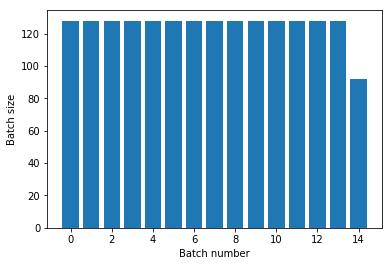

In [0]:
titanic_batches = titanic_file.repeat(3).batch(128)
plot_batches(titanic_batches)

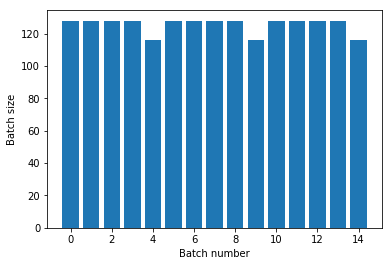

In [0]:
titanic_batches = titanic_file.batch(128).repeat(3)
plot_batches(titanic_batches)

In [0]:
epochs = 3

dataset = titanic_file.batch(batch_size=128,drop_remainder=False)
for e in range(epochs):
    for batch in dataset:
        print(batch.shape)
    print(f"Epoch; {e+1}/{epochs}")

(128,)
(128,)
(128,)
(128,)
(116,)
Epoch; 1/3
(128,)
(128,)
(128,)
(128,)
(116,)
Epoch; 2/3
(128,)
(128,)
(128,)
(128,)
(116,)
Epoch; 3/3


#### Randomly shuffling input data

In [0]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [0]:
for n, line_batch in dataset.take(1):
    print(n.numpy())
    print(line_batch.numpy())

[ 13  52  86  79 102  61  20  30  71  77  67  98  34  72 101  22   6  26
  53 107]
[b'0,male,2.0,4,1,29.125,Third,unknown,Queenstown,n'
 b'1,male,28.0,1,1,15.2458,Third,unknown,Cherbourg,n'
 b'1,female,28.0,1,0,24.15,Third,unknown,Queenstown,n'
 b'0,female,28.0,0,0,7.8958,Third,unknown,Southampton,y'
 b'0,female,47.0,1,0,14.5,Third,unknown,Southampton,n'
 b'0,male,28.0,0,0,8.05,Third,unknown,Southampton,y'
 b'0,male,28.0,0,0,7.225,Third,unknown,Cherbourg,y'
 b'1,male,28.0,0,0,7.2292,Third,unknown,Cherbourg,y'
 b'0,male,24.0,0,0,8.05,Third,unknown,Southampton,y'
 b'1,female,34.0,0,1,23.0,Second,unknown,Southampton,n'
 b'0,male,28.0,0,0,47.1,First,unknown,Southampton,y'
 b'0,male,28.0,0,0,7.75,Third,unknown,Queenstown,y'
 b'0,male,28.0,0,0,7.8958,Third,unknown,Cherbourg,y'
 b'0,male,46.0,1,0,61.175,First,E,Southampton,n'
 b'0,male,20.0,0,0,7.05,Third,unknown,Southampton,y'
 b'1,female,28.0,0,0,7.8792,Third,unknown,Queenstown,y'
 b'0,male,2.0,3,1,21.075,Third,unknown,Southampton,n'
 b'1,f

In [0]:
n, line_batch = next(iter(dataset))
print(n.numpy())
print(line_batch.numpy())

[ 90  33  50  57  83  91  80 103  12  92  67  32  71 110 105  22   4  87
  78  34]
[b'0,female,17.0,0,0,14.4583,Third,unknown,Cherbourg,y'
 b'0,female,27.0,1,0,21.0,Second,unknown,Southampton,n'
 b'0,male,45.0,1,0,83.475,First,C,Southampton,n'
 b'0,male,21.0,0,0,73.5,Second,unknown,Southampton,y'
 b'0,male,37.0,2,0,7.925,Third,unknown,Southampton,n'
 b'0,male,21.0,0,0,7.925,Third,unknown,Southampton,y'
 b'0,male,28.0,0,0,7.8958,Third,unknown,Southampton,y'
 b'0,male,23.0,0,0,15.0458,Second,unknown,Cherbourg,y'
 b'0,female,14.0,0,0,7.8542,Third,unknown,Southampton,y'
 b'0,male,70.5,0,0,7.75,Third,unknown,Queenstown,y'
 b'0,male,28.0,0,0,47.1,First,unknown,Southampton,y'
 b'0,female,40.0,1,0,9.475,Third,unknown,Southampton,n'
 b'0,male,24.0,0,0,8.05,Third,unknown,Southampton,y'
 b'0,male,19.0,0,0,6.75,Third,unknown,Queenstown,y'
 b'0,male,37.0,1,0,53.1,First,C,Southampton,n'
 b'1,female,28.0,0,0,7.8792,Third,unknown,Queenstown,y'
 b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
 b'0,male

In [0]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()
dataset = tf.data.Dataset.zip((counter, lines))
dataset = dataset.shuffle(buffer_size=100, seed=1).batch(128).repeat(3)
dataset

<RepeatDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [0]:
for n, line in dataset.take(5):
    print(n.shape)

(128,)
(128,)
(128,)
(128,)
(116,)


In [0]:
for n, line in dataset.skip(3).take(5):
    print(n.shape)

(128,)
(116,)
(128,)
(128,)
(128,)


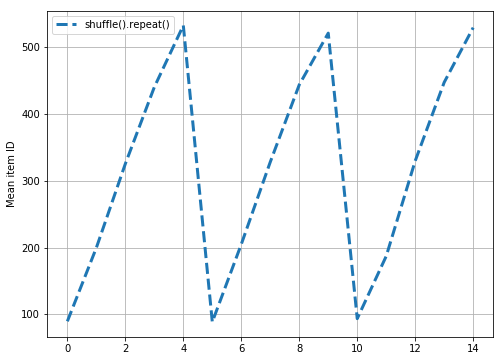

In [0]:
plt.figure(figsize=(8,6))
shuffle_repeat = [n.numpy().mean() for n, line_batch in dataset]
plt.plot(shuffle_repeat,"--", label = "shuffle().repeat()",lw=3)
plt.ylabel("Mean item ID")
plt.legend()
plt.grid(True)

In [0]:
dataset = tf.data.Dataset.zip((counter, lines))
shuffled = dataset.repeat(3).shuffle(buffer_size=100).batch(128)
print("Items near each epoch boundary: \n")
for n , line_batch in shuffled.skip(10).take(3):
    print(n.numpy())

Items near each epoch boundary: 

[112  47  39 624  83 137 563 126  95  14 594 100 104  78  34 426  10   5
 602 601 109  29  52 141 147  86 488  89 465  40 124 148  94 123  43  71
 154 108  15 554 146  63 105 153 127 166 564 161 132 529  85 155 118 171
 565 168  73 131 174   1 231 152 115 542 116 129 139 145 121 189 185  21
 543 125  64 176  37 158 107  35 156 196 198 188 566 151 102 165  99 159
 192 160 627 205 210 214 204 120  51  82 223 216 150 178  88 224 169 172
 215  84 163  59 186 234  96 130 202 137  33 424 175 114 230 138 200 135
 239 157]
[173  12 222 227 235 190 208  91 256 250 113 606 199 220 244 134 181 569
 213  98 212 197 203 164  97 264 128 276 274 142 218 170 259 278 508 233
 238 136 280 279 455 183  38 231 285  75 119 249 277 292  79 179 187 298
 297 245 265 559 162  69 219 236 177 232 304 260 540 246 286 106 268 257
 269 240 312 143 290 320 193 122 281 301 254 149 217 314 325 335 225 316
 284 263 315 206 266 319 302 300 323 258 296 237 306 211 270 326 356 555
 283 33

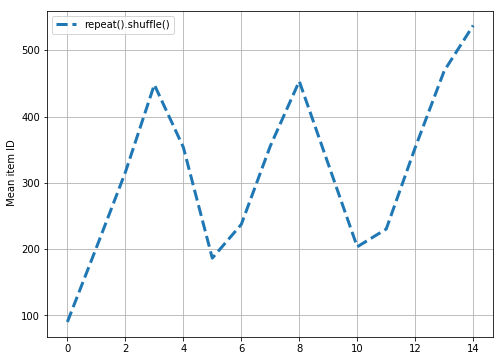

In [0]:
plt.figure(figsize=(8,6))
repeat_shuffle = [n.numpy().mean() for n, line in shuffled]
plt.plot(repeat_shuffle,"--",label="repeat().shuffle()",lw=3)
plt.ylabel(" Mean item ID")
plt.legend()
plt.grid(True)

### Preprocessing data

    The Dataset.map(f) transformation produces a new dataset by applying a given function f to each element of the input dataset. It is based on the map() function that is commonly applied to lists (and other structures) in functional programming languages. The function f takes the tf.Tensor objects that represent a single element in the input, and returns the tf.Tensor objects that will represent a single element in the new dataset. Its implementation uses standard TensorFlow operations to transform one element into another.

#### Decoding image data and resizing it

In [0]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

228818944/228813984 [==============================] - 2s 0us/step


In [0]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [0]:
for i  in list_ds.take(10):
    print(i.numpy())

b'/root/.keras/datasets/flower_photos/daisy/3336704121_cfeb67a7d7.jpg'
b'/root/.keras/datasets/flower_photos/tulips/14674067742_73c2602aa6_m.jpg'
b'/root/.keras/datasets/flower_photos/tulips/14124669683_7fb74f20c3.jpg'
b'/root/.keras/datasets/flower_photos/tulips/8605564823_7a59d3d92a.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/4927658421_7eed83bc95_m.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/9939430464_5f5861ebab.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/17148843706_df148301ac_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/8713389178_66bceb71a8_n.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/14955545254_324cd4ee75.jpg'
b'/root/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'


In [0]:
def parse_image(filename):
    parts = tf.strings.split(filename,'/')
    label = parts[-2]

    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128,128])
    return image, label

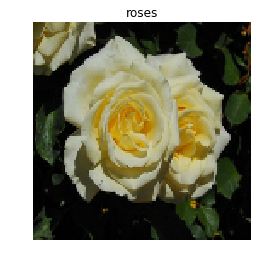

In [0]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

def show(image,label):
    plt.imshow(image)
    plt.title(label.numpy().decode('utf-8'))
    plt.axis("off")

show(image, label)

In [0]:
list_ds.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

In [0]:
image_ds = list_ds.map(parse_image)

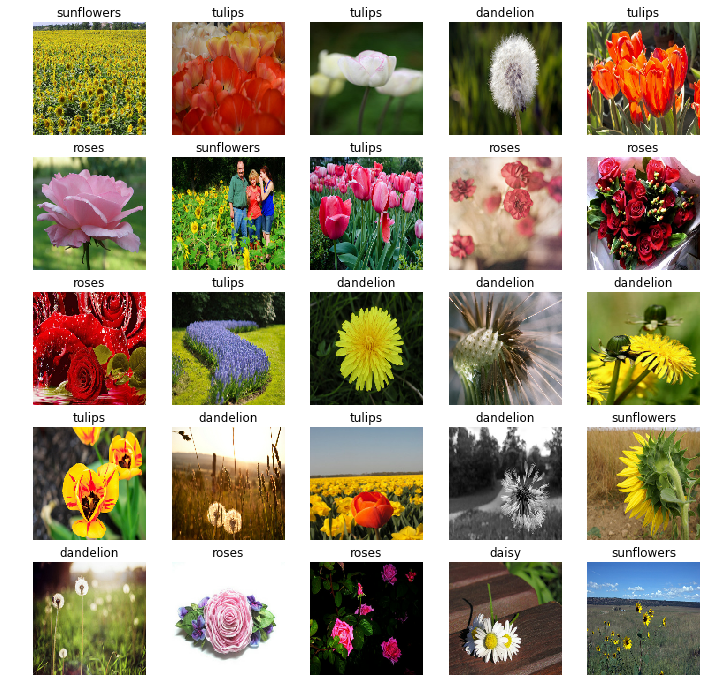

In [0]:
plt.figure(figsize=(12,12))
for i, (image, label)  in enumerate(image_ds.take(25)):
    plt.subplot(5,5,i+1)
    show(image, label)

#### Applying arbitray Python logic

In [0]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
    image = ndimage.rotate(image, np.random.uniform(-30,30), reshape=False)
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

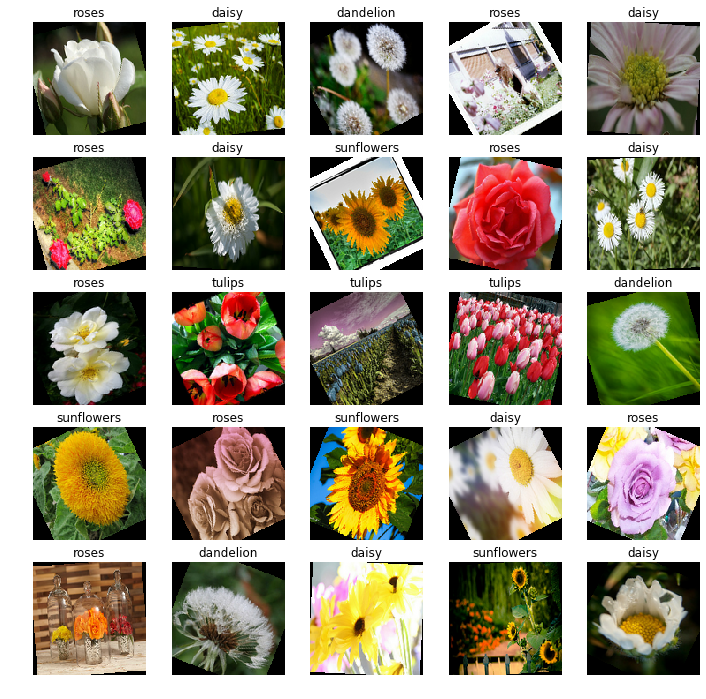

In [100]:
plt.figure(figsize=(12,12))
for i, (image, label) in enumerate(image_ds.take(25)):
    image = random_rotate_image(image)
    plt.subplot(5, 5, i+1)
    show(image, label)

    To use this function with Dataset.map the same caveats apply as with Dataset.from_generator, you need to describe the return shapes and types when you apply the function:

In [0]:
def tf_random_rotate_image(image, label):
    im_shape = image.shape
    [image, ] = tf.py_function(random_rotate_image, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

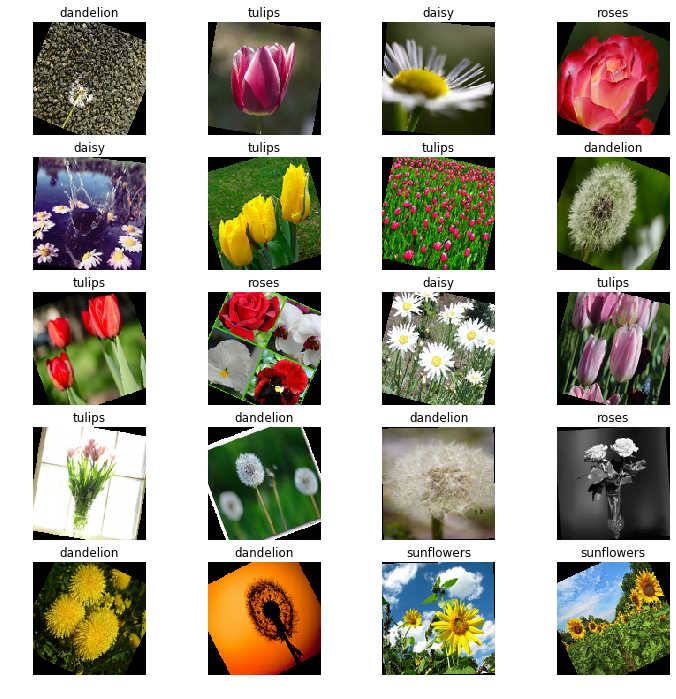

In [109]:
plt.figure(figsize=(12,12))
rot_ds = image_ds.map(tf_random_rotate_image)
for i , (image, label) in enumerate(rot_ds.take(20)):
    plt.subplot(5, 4, i+1)
    show(image, label)

#### Parsing tf.Example protocol buffer messages

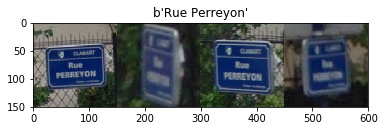

In [132]:
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")
dataset = tf.data.TFRecordDataset(fsns_test_file)
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())
feature = parsed.features.feature
raw_img = feature["image/encoded"].bytes_list.value[0]
img = tf.image.decode_png(raw_img)
plt.imshow(img)
_ = plt.title(feature["image/text"].bytes_list.value[0])

In [0]:
raw_example = (next(iter(dataset)))

In [0]:
def tf_parse(raw_examples):
    example = tf.io.parse_example(
        raw_example[tf.newaxis],
        {
            'image/encoded': tf.io.FixedLenFeature(shape=(), dtype=tf.string),
            'image/text': tf.io.FixedLenFeature(shape=(), dtype=tf.string)
        }
    )
    return example["image/encoded"][0], example['image/text'][0]

In [142]:
img, txt = tf_parse(raw_example)
print(txt.numpy())

b'Rue Perreyon'


In [143]:
print(repr(img.numpy()[:20]), "...")

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02X' ...


In [144]:
decoded = dataset.map(tf_parse)
decoded

<MapDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [0]:
image_batch, text_batch = next(iter(decoded.batch(10)))

In [146]:
image_batch.shape

TensorShape([10])

#### Time Series Windowing

#### Resampling

### Using high-level API's

#### tf.keras

In [147]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
fmnist = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist = fmnist.shuffle(5000).batch(128)

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [153]:
model.fit(fmnist, epochs=2)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/2
469/469 [==============================] - 5s 10ms/step - loss: 0.5524 - accuracy: 0.8087
Epoch 2/2
469/469 [==============================] - 2s 5ms/step - loss: 0.4076 - accuracy: 0.8576


In [154]:
model.fit(fmnist.repeat(), epochs=2, steps_per_epoch=20)

Train for 20 steps
Epoch 1/2
20/20 [==============================] - 0s 11ms/step - loss: 0.3785 - accuracy: 0.8668
Epoch 2/2
20/20 [==============================] - 0s 5ms/step - loss: 0.3930 - accuracy: 0.8629


In [159]:
results = model.evaluate(fmnist.repeat(), steps=50)
print(results[0])
print(results[1])

50/50 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.8706
0.36265663921833036
0.870625


In [160]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds, steps=10)
print(result.shape)

(320, 10)


In [161]:
result = model.predict(fmnist, steps=10)
print(result.shape)

(1280, 10)


#### tf.estimator

In [0]:
import tensorflow_datasets as tfds

def train_input_fn():
    titanic = tf.data.experimental.make_csv_dataset(
        titanic_file, batch_size=32, label_name="survived"
    )
    titanic_batches = (
        titanic.cache().repeat().shuffle(500)
        .prefetch(tf.data.experimental.AUTOTUNE)
    )
    return titanic_batches

In [0]:
embark = tf.feature_column.sequence_categorical_column_with_hash_bucket('embark_town',32)
cls = tf.feature_column.categorical_column_with_vocabulary_list('class', ['First','Second','Third'])
age = tf.feature_column.numeric_column('age')

In [184]:
import tempfile
model_dir = tempfile.mkdtemp()
model = tf.estimator.LinearClassifier(
    model_dir = model_dir,
    feature_columns = [embark, cls, age],
    n_classes = 2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpt1l_lvrt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f8d53f373c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [185]:
model = model.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt1l_lvrt/model.ckpt.
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 375.673
INFO:tensorflow:loss = 0.59725696, step = 100 (0.269 sec)
INFO:tensorflow:global_step/sec: 614.854
INFO:tensorflow:loss = 0.6442936, step = 200 (0.161 sec)
INFO:tensorflow:global_step/sec: 636.968
INFO:tensorflow:loss = 0.62445724, step = 300 (0.157 sec)
INFO:tensorflow:global_step/sec: 575.444
INFO:tensorflow:loss = 0.47434923, step = 400 (0.176 sec)
INFO:tensorflow:global_step/sec: 630.894
INFO:tensorflow:loss = 0.6237, step = 500 (0.160 sec)
INFO:tensorflow:global_step/sec: 633.83
INFO:tensorflow:loss = 0.62918365, step = 600 (0.155 sec)
INFO:tensorflow:global_step/sec: 619.831
INFO:tensorflow:

In [186]:
result = model.evaluate(train_input_fn, steps=10)

for key, value in result.items():
    print(key, ":", value)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-10-07T17:46:27Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpt1l_lvrt/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/10]
INFO:tensorflow:Evaluation [2/10]
INFO:tensorflow:Evaluation [3/10]
INFO:tensorflow:Evaluation [4/10]
INFO:tensorflow:Evaluation [5/10]
INFO:tensorflow:Evaluation [6/10]
INFO:tensorflow:Evaluation [7/10]
INFO:tensorflow:Evaluation [8/10]
INFO:tensorflow:Evaluation [9/10]
INFO:tensorflow:Evaluation [10/10]
INFO:tensorflow:Finished evaluation at 2019-10-07-17:46:28
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7375, accuracy_baseline = 0.615625, auc = 0.777537, auc_precision_recall = 0.6677599, average_loss = 0.55280876, global_step = 1000, label/mean = 0.384375, loss = 0.55280876, precision = 0.71428573, prediction

In [187]:
for pred in model.predict(train_input_fn):
    for key, value in pred.items():
        print(key, ":", value)
    break

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpt1l_lvrt/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
logits : [0.0776]
logistic : [0.5194]
probabilities : [0.4806 0.5194]
class_ids : [1]
classes : [b'1']
all_class_ids : [0 1]
all_classes : [b'0' b'1']
